# Clean Datasets With Python
Author: Scottie Housholder  
Course: MAT 311  
Updated: November 17, 2025#TODO:

# Load Necessary Libraries

In [307]:
#Working with the data
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Load The Data

In [308]:
#Load the data
#TODO: This will be turned into a function for main.py when I get there
test_data = pd.read_csv("../data/raw/test.csv")
train_data = pd.read_csv("../data/raw/train.csv")


# View The Data

In [309]:
#View train_data
print("Train data:")
train_data.head(1)

Train data:


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date,Churn
0,321685,47,Male,52.0,9,4,10.0,Basic,Quarterly,738.64,NaN,active,06-28,07-08,0


In [310]:
#View test_data
print("Test data:")
test_data.head(1)

Test data:


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Last Due Date,Last Payment Date,Customer Status
0,146773,43,Male,25.0,28,9,18,Standard,Monthly,809.0,7.0,06-30,07-18,active


In [311]:
#View shape of dataframes
print(f"Train data shape:  {train_data.shape}")
print(f"Test data shape:  {test_data.shape}")

Train data shape:  (303124, 15)
Test data shape:  (133776, 14)


In [312]:
#View info of train_data:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303124 entries, 0 to 303123
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         303124 non-null  int64  
 1   Age                303124 non-null  int64  
 2   Gender             303124 non-null  object 
 3   Tenure             241267 non-null  float64
 4   Usage Frequency    303124 non-null  int64  
 5   Support Calls      240804 non-null  object 
 6   Payment Delay      214785 non-null  float64
 7   Subscription Type  303124 non-null  object 
 8   Contract Length    303124 non-null  object 
 9   Total Spend        303124 non-null  float64
 10  Last Interaction   240717 non-null  float64
 11  Customer Status    303124 non-null  object 
 12  Last Due Date      303124 non-null  object 
 13  Last Payment Date  303124 non-null  object 
 14  Churn              303124 non-null  int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 34

In [313]:
#View info of test_data:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133776 entries, 0 to 133775
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         133776 non-null  int64  
 1   Age                133776 non-null  int64  
 2   Gender             133776 non-null  object 
 3   Tenure             106412 non-null  float64
 4   Usage Frequency    133776 non-null  int64  
 5   Support Calls      106211 non-null  object 
 6   Payment Delay      133776 non-null  int64  
 7   Subscription Type  133776 non-null  object 
 8   Contract Length    133776 non-null  object 
 9   Total Spend        133776 non-null  float64
 10  Last Interaction   106466 non-null  float64
 11  Last Due Date      133776 non-null  object 
 12  Last Payment Date  133776 non-null  object 
 13  Customer Status    133776 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 14.3+ MB


In [314]:
#Descrive train_data:
train_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Payment Delay,Total Spend,Last Interaction,Churn
count,303124.000000,303124.000000,241267.000000,303124.000000,214785.000000,303124.000000,240717.000000,303124.000000
mean,302495.086024,38.464872,31.536149,15.944221,10.257499,666.817412,14.043258,0.299999
std,129863.999792,11.669990,17.216746,8.543779,6.568484,223.308042,8.525500,0.458258
min,2.000000,18.000000,1.000000,1.000000,0.000000,100.000000,1.000000,0.000000
25%,226791.250000,29.000000,17.000000,9.000000,5.000000,540.000000,7.000000,0.000000
50%,324773.500000,39.000000,32.000000,16.000000,10.000000,693.010000,13.000000,0.000000
75%,405050.250000,47.000000,46.000000,23.000000,15.000000,846.280000,21.000000,1.000000
max,505204.000000,65.000000,60.000000,30.000000,30.000000,1000.000000,30.000000,1.000000


In [315]:
#Describe test_data:
test_data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Payment Delay,Total Spend,Last Interaction
count,133776.000000,133776.000000,106412.000000,133776.000000,133776.000000,133776.000000,106466.000000
mean,184110.662264,41.399623,31.149353,15.415628,15.446478,599.791797,15.393891
std,138527.762204,13.758618,17.236447,8.708546,8.922529,354.100586,8.656683
min,1.000000,18.000000,1.000000,1.000000,0.000000,100.000000,1.000000
25%,78799.750000,30.000000,16.000000,8.000000,8.000000,331.000000,8.000000
50%,156365.000000,41.000000,31.000000,15.000000,16.000000,558.000000,15.000000
75%,235514.500000,53.000000,46.000000,23.000000,23.000000,805.000000,23.000000
max,505206.000000,65.000000,60.000000,30.000000,30.000000,2000.000000,30.000000


# Data Wrangling

In [316]:
#View missing train data
print(f"Train data null values:\n{train_data.isna().sum()}")

Train data null values:
CustomerID               0
Age                      0
Gender                   0
Tenure               61857
Usage Frequency          0
Support Calls        62320
Payment Delay        88339
Subscription Type        0
Contract Length          0
Total Spend              0
Last Interaction     62407
Customer Status          0
Last Due Date            0
Last Payment Date        0
Churn                    0
dtype: int64


In [317]:
#View missing test data
print(f"Test data null values: \n{test_data.isna().sum()}")

Test data null values: 
CustomerID               0
Age                      0
Gender                   0
Tenure               27364
Usage Frequency          0
Support Calls        27565
Payment Delay            0
Subscription Type        0
Contract Length          0
Total Spend              0
Last Interaction     27310
Last Due Date            0
Last Payment Date        0
Customer Status          0
dtype: int64


### Reorganize columns in test_data

In [318]:
#Make columns in test_data be in the same order as those in train_data
test_data = test_data[['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 
       'Customer Status', 'Last Due Date', 'Last Payment Date']]
print("Reordered test data:")
test_data.head(1)

Reordered test data:


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Customer Status,Last Due Date,Last Payment Date
0,146773,43,Male,25.0,28,9,18,Standard,Monthly,809.0,7.0,active,06-30,07-18


In [319]:
#Test if columns are in the same order
assert(list(train_data.columns) == list(train_data.columns))

### Handle missing values in tenure columns

In [320]:
print(train_data.Tenure.unique())
print(test_data.Tenure.unique())

[52. 13. nan 18. 25. 24. 15.  1.  6. 30. 26. 21. 59. 49. 43. 33. 10. 11.
  3. 38. 42. 57. 60. 32.  8.  9. 44. 40. 53. 55. 28. 31. 29. 41. 14. 56.
 45. 39. 48. 47. 34.  5. 12. 27. 54. 16. 46. 19. 35. 36.  7. 50. 20. 51.
 23.  4. 22.  2. 37. 58. 17.]
[25. nan 58. 13.  9.  7.  2. 19.  5. 46. 55. 27. 43. 30. 12.  4.  8.  1.
 59. 41. 51. 54. 53. 57. 48. 32. 50. 21. 24. 34. 35. 18. 31. 56. 29. 45.
 26.  6. 22. 40. 38. 47. 52. 60. 23. 15. 33. 37. 36.  3. 39. 17. 28. 44.
 42. 10. 11. 20. 14. 49. 16.]


<Axes: xlabel='Tenure', ylabel='Count'>

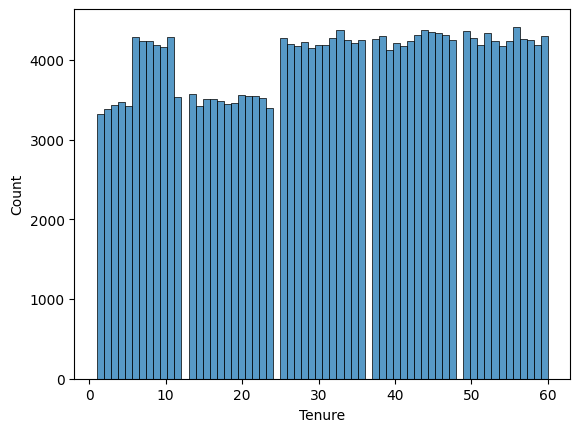

In [321]:
# View train_data's Tenure
sns.histplot(data=train_data, x="Tenure")

<Axes: xlabel='Tenure', ylabel='Count'>

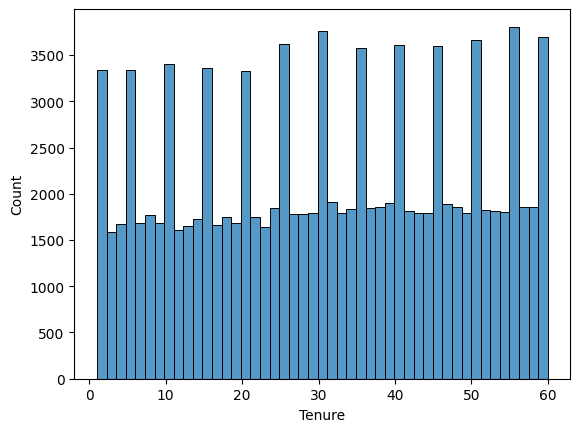

In [322]:
# View test_data's Tenure
sns.histplot(data=test_data, x="Tenure")

In [323]:
#Because both DataFrames' Tenure columns are not uniform, fill missing values with median
#THIS IS TEMPORARY AND BAD (likely will impute with KNN later)
print(train_data.Tenure.isna().sum())
print(test_data.Tenure.isna().sum())
train_data.Tenure = train_data.Tenure.fillna(train_data.Tenure.median())
test_data.Tenure = test_data.Tenure.fillna(test_data.Tenure.median())
print(train_data.Tenure.isna().sum())
print(test_data.Tenure.isna().sum())

61857
27364
0
0


### Handle missing values in support calls columns

#### Fix all values that say 'none' instead of NaN and cast to float

In [324]:
print(train_data["Support Calls"].unique())
print(test_data["Support Calls"].unique())

['4' '1' '6' '3' '2' '7' nan '9' '5' 'none' '10' '8']
['9' '8' '1' '5' '6' '7' '10' '2' '4' nan '3' 'none']


In [325]:
train_data["Support Calls"] = train_data["Support Calls"].replace({"none": np.NaN}).astype("Float64")
train_data.dtypes

CustomerID             int64
Age                    int64
Gender                object
Tenure               float64
Usage Frequency        int64
Support Calls        Float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Customer Status       object
Last Due Date         object
Last Payment Date     object
Churn                  int64
dtype: object

In [326]:
test_data["Support Calls"] = test_data["Support Calls"].replace({"none": np.NaN}).astype("Float64")
train_data.dtypes

CustomerID             int64
Age                    int64
Gender                object
Tenure               float64
Usage Frequency        int64
Support Calls        Float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Customer Status       object
Last Due Date         object
Last Payment Date     object
Churn                  int64
dtype: object

#### Fill missing values

<Axes: xlabel='Support Calls', ylabel='count'>

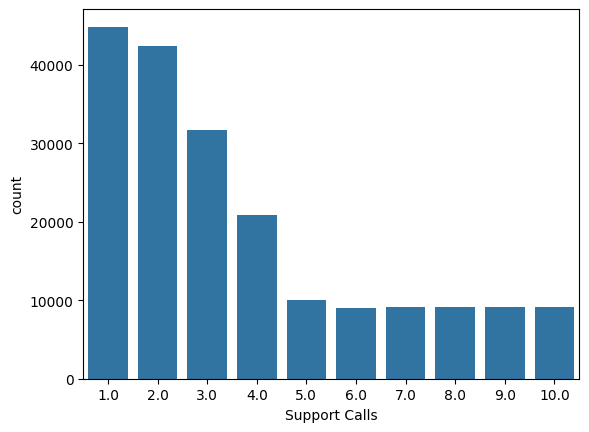

In [327]:
# View train_data's support calls
sns.countplot(data=train_data, x="Support Calls")

<Axes: xlabel='Support Calls', ylabel='count'>

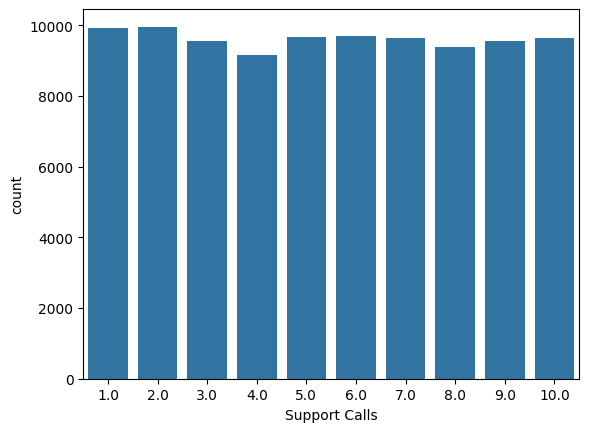

In [328]:
# View test_data's support calls
sns.countplot(data=test_data, x="Support Calls")

In [329]:
#Fill train data with mean and test data with median
#TEMPORARY AND BAD
print(train_data["Support Calls"].isna().sum())
print(test_data["Support Calls"].isna().sum())
train_data["Support Calls"] = train_data["Support Calls"].fillna(train_data["Support Calls"].mean())
test_data["Support Calls"] = test_data["Support Calls"].fillna(test_data["Support Calls"].median())
print(train_data["Support Calls"].isna().sum())
print(test_data["Support Calls"].isna().sum())

107511
37605
0
0


### Handle missing values in train_data's Payment Delay column

In [330]:
print(train_data["Payment Delay"].unique())
print(test_data["Payment Delay"].unique())

[10.  0. nan  4.  2. 18. 13. 15.  8. 17. 14.  5. 19. 16. 12.  7. 20.  3.
  1.  6.  9. 11. 27. 24. 30. 25. 29. 28. 21. 23. 22. 26.]
[18 20  1  5 13 14  3 21  6 26 10 15  7  4 11 27  2  8 12  0 23 28 22 16
 29  9 24 19 25 17 30]


<Axes: xlabel='Payment Delay', ylabel='count'>

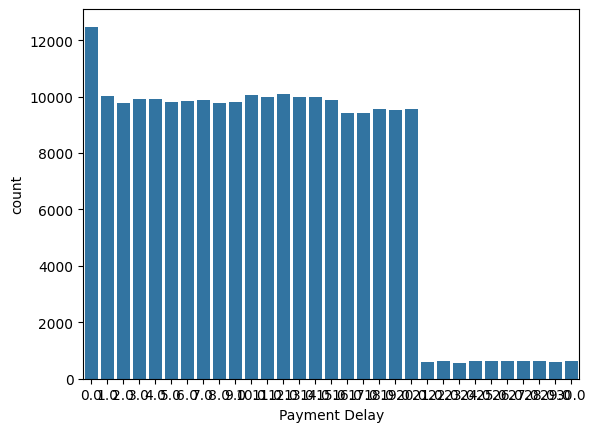

In [331]:
sns.countplot(data=train_data, x="Payment Delay")

In [332]:
#Fill missing values with mode
#TEMPORARY AND BAD
print(train_data["Payment Delay"].isna().sum())
train_data["Payment Delay"] = train_data["Payment Delay"].fillna(train_data["Payment Delay"].median())
print(train_data["Payment Delay"].isna().sum())

88339
0


### Handle missing values in Last Interaction

<Axes: xlabel='Last Interaction', ylabel='count'>

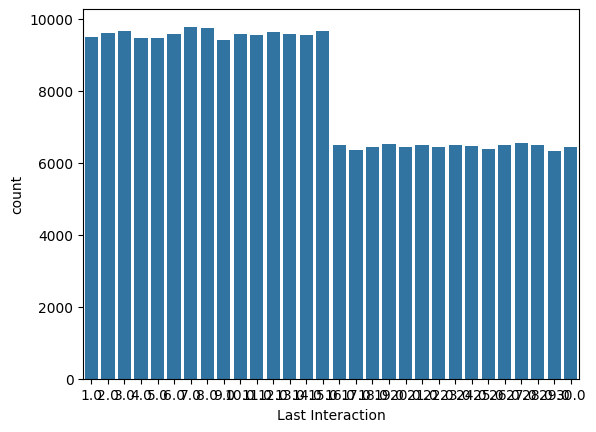

In [333]:
sns.countplot(data=train_data, x="Last Interaction")

<Axes: xlabel='Last Interaction', ylabel='count'>

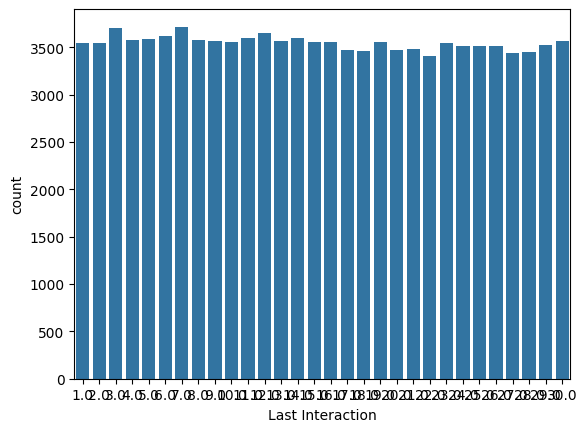

In [334]:
sns.countplot(data=test_data, x="Last Interaction")

In [335]:
#Fill train_data col with mean and test_data with median
#TEMPORARY AND BAD
print(train_data["Last Interaction"].isna().sum())
print(test_data["Last Interaction"].isna().sum())
train_data["Last Interaction"] = train_data["Last Interaction"].fillna(train_data["Last Interaction"].median())
test_data["Last Interaction"] = test_data["Last Interaction"].fillna(test_data["Last Interaction"].median())
print(train_data["Last Interaction"].isna().sum())
print(test_data["Last Interaction"].isna().sum())

62407
27310
0
0


In [336]:
train_data.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Customer Status      0
Last Due Date        0
Last Payment Date    0
Churn                0
dtype: int64

In [337]:
test_data.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Customer Status      0
Last Due Date        0
Last Payment Date    0
dtype: int64

# Save Cleaned Data for ML

In [339]:
train_data.to_csv("../data/processed/train_cleaned_temp.csv")
test_data.to_csv("../data/processed/test_cleaned_temp.csv")